#### NAME : B VIGNESH
#### ROLL NUMBER : CED18I007

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
import seaborn as sns

In [98]:
from sklearn.datasets import load_boston
boston = load_boston()
columns = boston.feature_names
# creating dataframes
df = pd.DataFrame(boston.data)
df.columns = columns
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [99]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [100]:
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [101]:
df.shape

(506, 14)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Dropping duplicates

In [103]:
duplicates = df[df.duplicated()]
duplicates

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.shape

(506, 14)

There are no duplicate rows in the dataset, and thus the shape has not recued after we attempted to drop the duplicate values.

# Missing value analysis

In [106]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

We can see there are no NULL values in each row/column. Thus, there are no candidate rows/columns to be dropped.

# Numerical feature analysis

## Target feature(PRICE)

In [107]:
df['PRICE'].nunique()

229

As mentioned in the description of the dataset, the target feature(PRICE) is numerical and continuous, since the dataset resembles a typical regression problem statement.

In [108]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


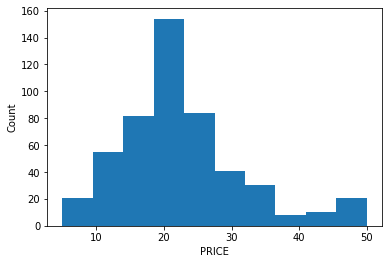

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


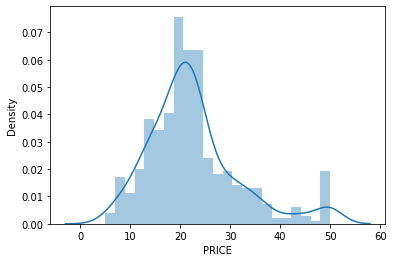

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


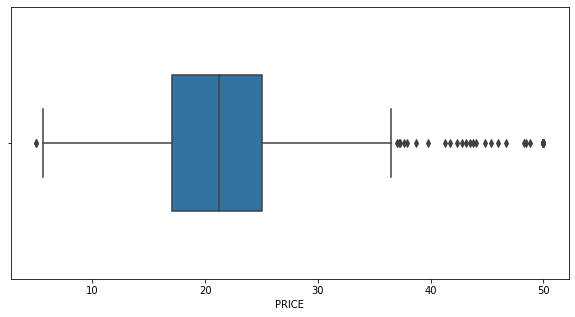

In [109]:
#Analyzing the target variable
target = df['PRICE']

plt.hist(target)
plt.xlabel('PRICE')
plt.ylabel('Count')
plt.show()
sns.distplot(target)
plt.show()
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(target, width=0.5)
plt.show()

In [110]:
print("Mean is: ",np.mean(target))
print("Median is: ",np.median(target))
print("Standard deviation is: ", sts.pstdev(target))

from scipy.stats import skew
print("Skewness is : ", skew(target))

q3 = np.percentile(target,75)
q1 = np.percentile(target,25)
iqr = q3 - q1
print("Inter quartile range is:",iqr)
limit1 = q3 + 1.5*iqr
limit2 = q1 - 1.5*iqr
out = df.loc[(target > limit1) | (target < limit2), 'PRICE'].count()
print("There are",out,"basic outliers")
limit1 = q3 + 3*iqr
limit2 = q1 - 3*iqr
out = df.loc[(target > limit1) | (target < limit2), 'PRICE'].count()
print("There are",out,"extreme outliers")

Mean is:  22.532806324110677
Median is:  21.2
Standard deviation is:  9.188011545278203
Skewness is :  1.104810822864635
Inter quartile range is: 7.975000000000001
There are 40 basic outliers
There are 16 extreme outliers


In [111]:
for col in df.columns:
    print(col,"has", df[col].nunique(),"values")

CRIM has 504 values
ZN has 26 values
INDUS has 76 values
CHAS has 2 values
NOX has 81 values
RM has 446 values
AGE has 356 values
DIS has 412 values
RAD has 9 values
TAX has 66 values
PTRATIO has 46 values
B has 357 values
LSTAT has 455 values
PRICE has 229 values


In [112]:
num_col = [col for col in df.columns if df[col].dtype != 'object']
num_col

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

We see that all features are numerical, although some are discrete while the others are continuous.


# Numerical features analysis

## Discrete features

As per the description of the dataset, and based on the number fo unique values each column has, we can infer that `CHAS` and `RAD` are discrete while the rest are continuous

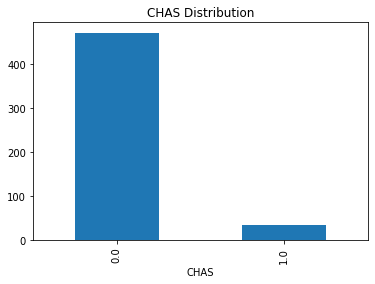

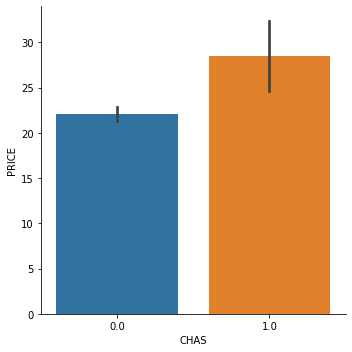

In [113]:
data = df.copy()
data.groupby('CHAS')['PRICE'].count().plot.bar()
plt.title('CHAS Distribution')
plt.show()
sns.catplot(data=df,x='CHAS',y='PRICE', kind='bar')
plt.show()

We see that for `CHAS`, most of the data belongs to the category 0.0, while the data belonging to `CHAS`=1 seem to have higher `PRICE` than that of 0.0

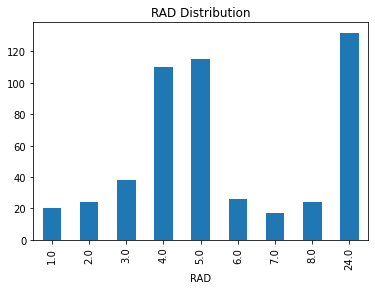

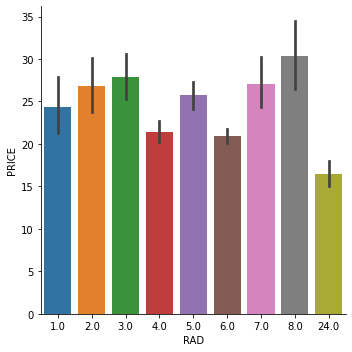

In [114]:
data = df.copy()
data.groupby('RAD')['PRICE'].count().plot.bar()
plt.title('RAD Distribution')
plt.show()
sns.catplot(data=df,x='RAD',y='PRICE', kind='bar')
plt.show()

## Continuous features

In [115]:
cont_cols = list(set(df.columns) - {'CHAS', 'RAD'})
cont_cols

['RM',
 'B',
 'ZN',
 'PRICE',
 'NOX',
 'AGE',
 'DIS',
 'TAX',
 'LSTAT',
 'INDUS',
 'PTRATIO',
 'CRIM']

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


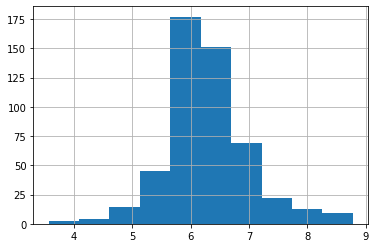

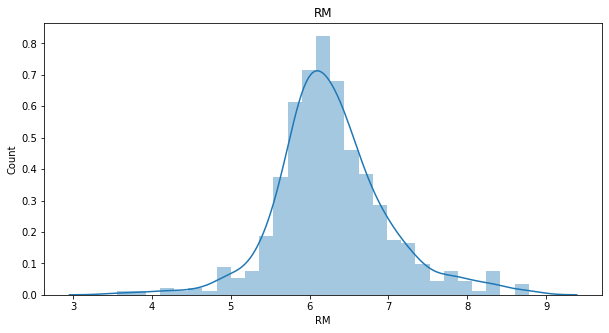

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


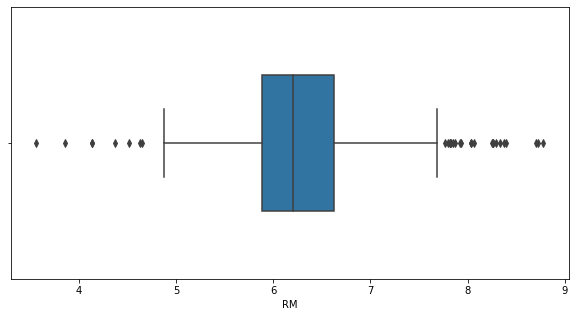

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for RM is: 0.7379999999999995
There are 30 basic outliers
There are 1 extreme outliers
Skewness of RM is :  0.40241466802496245



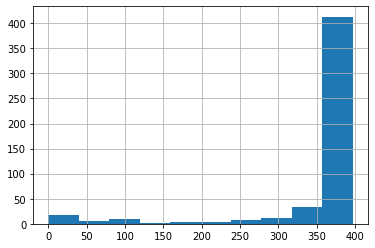

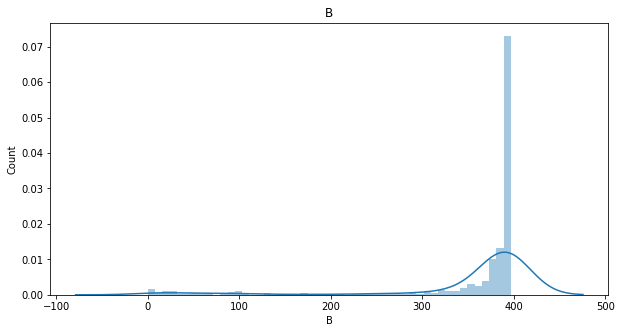

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


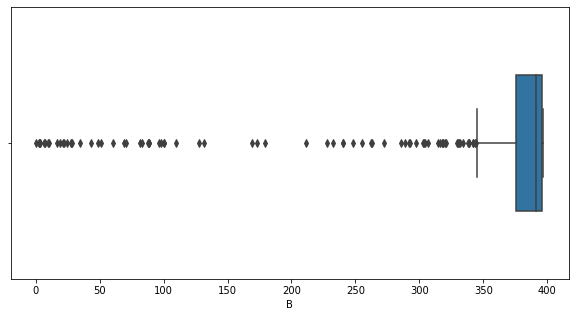

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for B is: 20.847500000000025
There are 77 basic outliers
There are 58 extreme outliers
Skewness of B is :  -2.8817983452627716



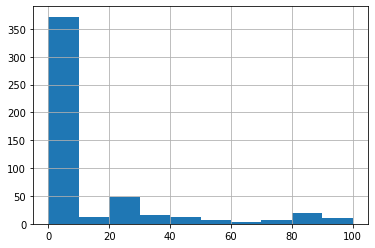

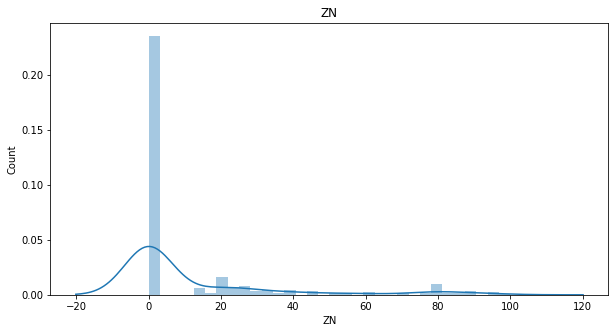

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


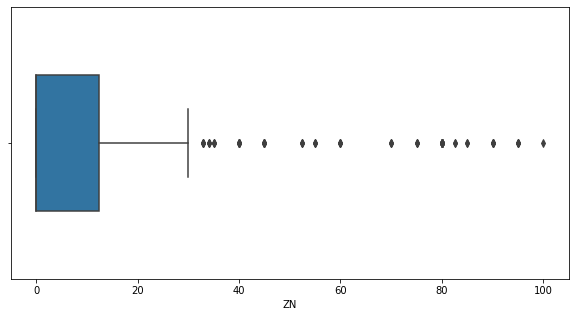

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for ZN is: 12.5
There are 68 basic outliers
There are 45 extreme outliers
Skewness of ZN is :  2.219063057148425



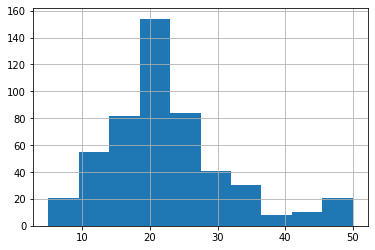

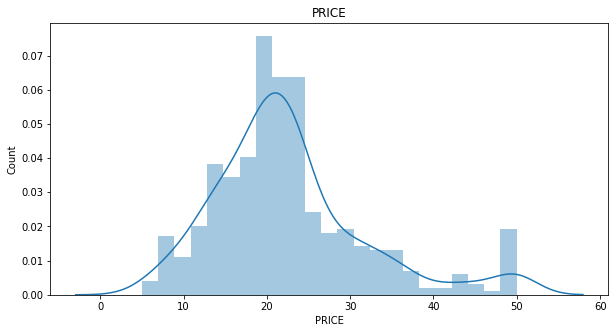

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


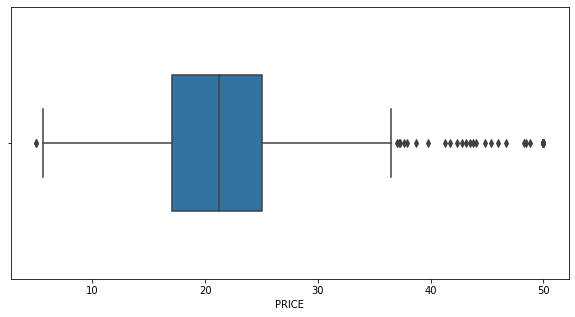

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for PRICE is: 7.975000000000001
There are 40 basic outliers
There are 16 extreme outliers
Skewness of PRICE is :  1.104810822864635



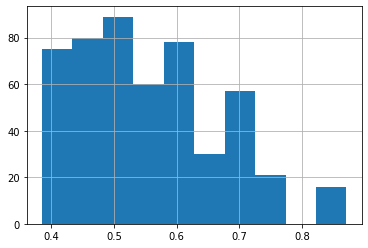

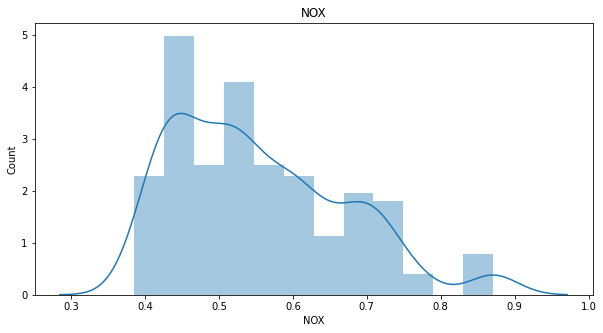

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


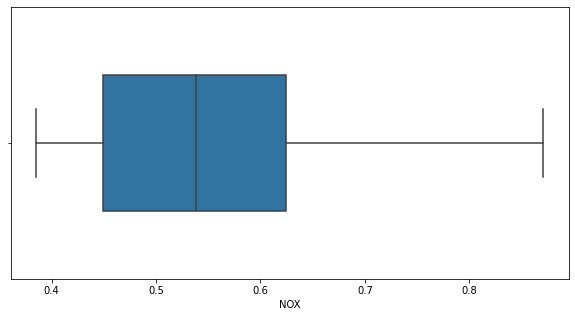

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for NOX is: 0.175
There are 0 basic outliers
There are 0 extreme outliers
Skewness of NOX is :  0.7271441597740319



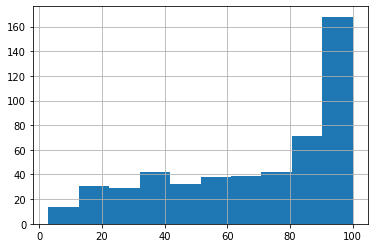

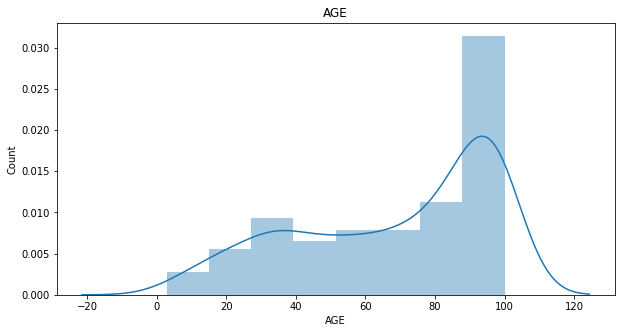

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


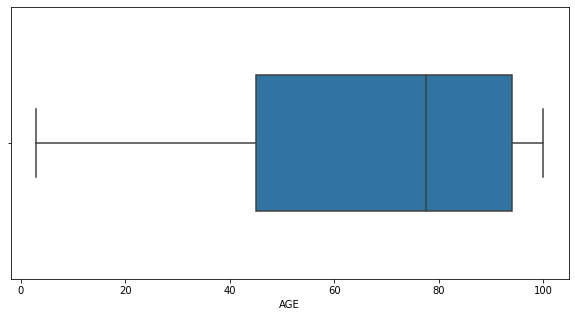

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for AGE is: 49.04999999999999
There are 0 basic outliers
There are 0 extreme outliers
Skewness of AGE is :  -0.5971855948016143



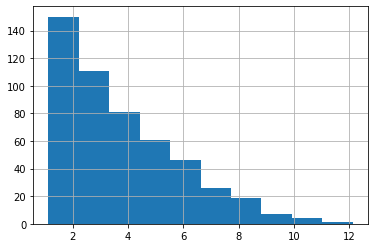

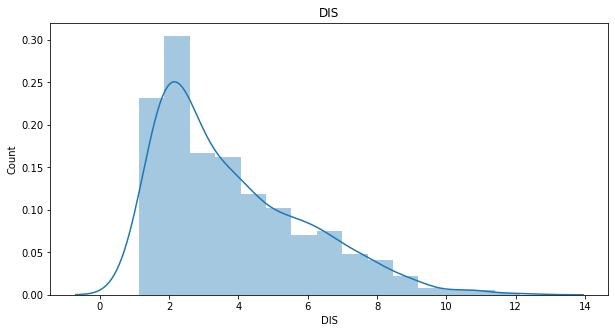

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


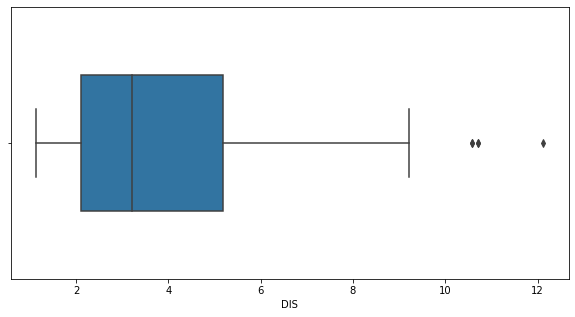

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for DIS is: 3.0882500000000004
There are 5 basic outliers
There are 0 extreme outliers
Skewness of DIS is :  1.0087787565152246



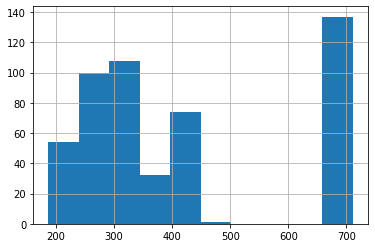

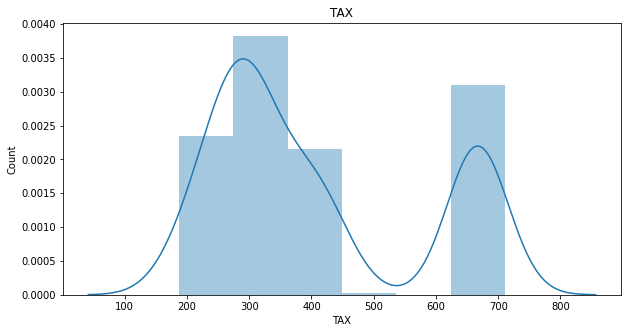

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


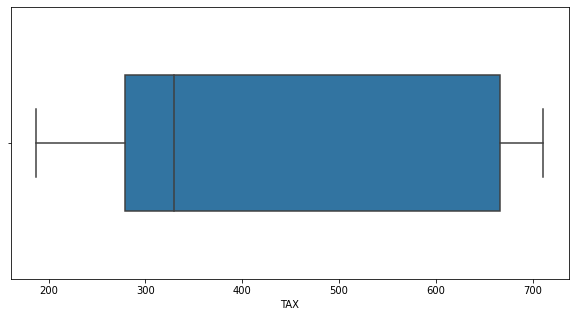

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for TAX is: 387.0
There are 0 basic outliers
There are 0 extreme outliers
Skewness of TAX is :  0.6679682687237768



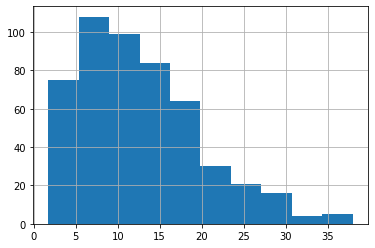

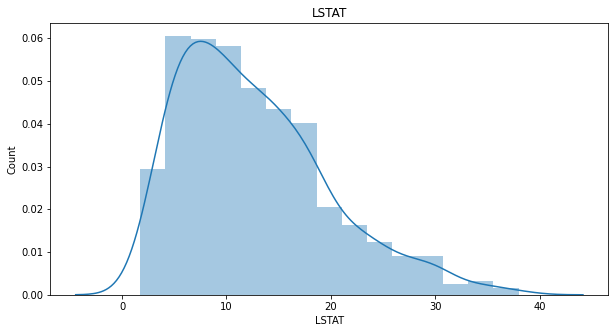

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


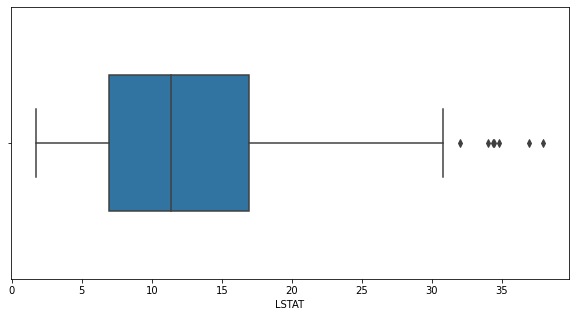

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for LSTAT is: 10.005000000000003
There are 7 basic outliers
There are 0 extreme outliers
Skewness of LSTAT is :  0.9037707431346133



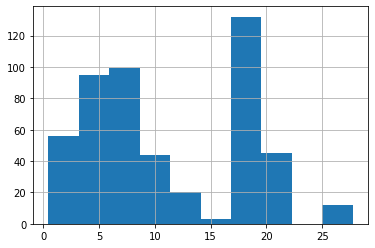

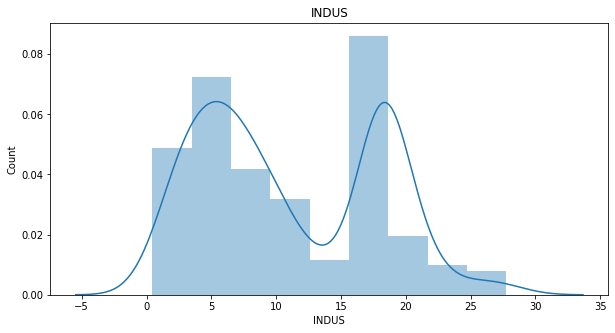

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


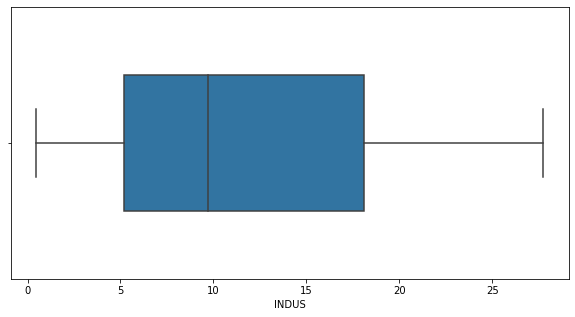

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for INDUS is: 12.91
There are 0 basic outliers
There are 0 extreme outliers
Skewness of INDUS is :  0.29414627684418543



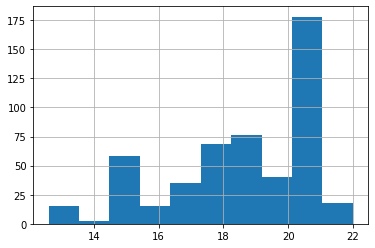

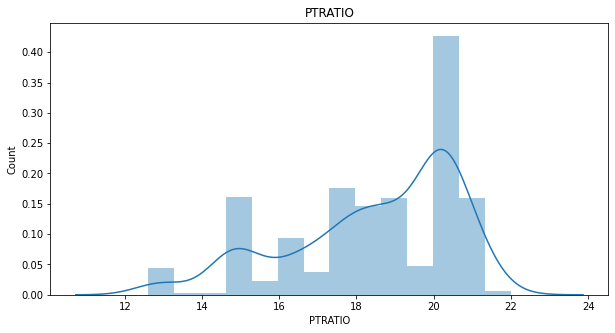

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


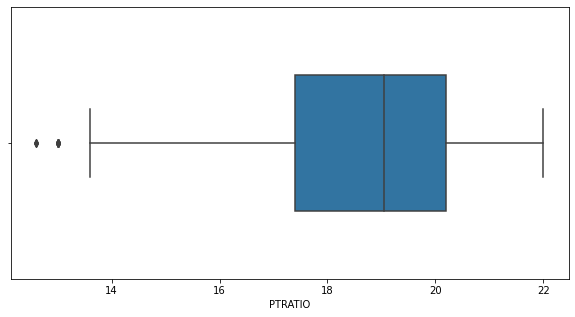

/home/vicky/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Inter quartile range for PTRATIO is: 2.8000000000000007
There are 15 basic outliers
There are 0 extreme outliers
Skewness of PTRATIO is :  -0.7999445320367449



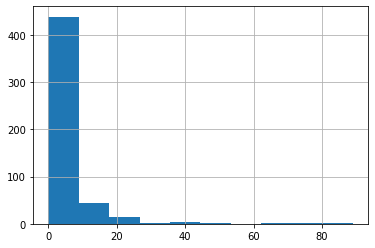

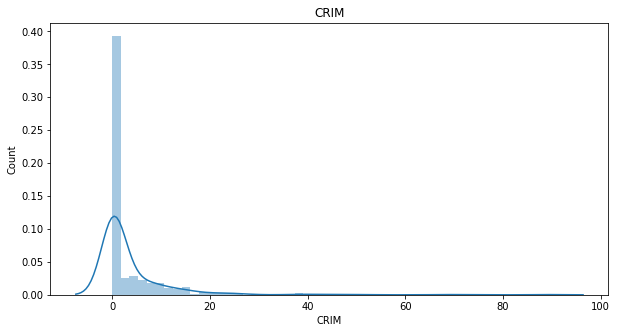

/home/vicky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


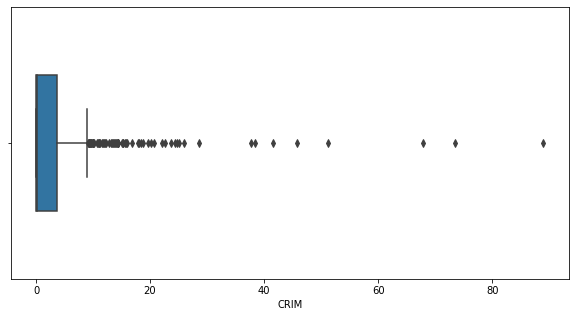

Inter quartile range for CRIM is: 3.5950375
There are 66 basic outliers
There are 30 extreme outliers
Skewness of CRIM is :  5.207652387859715



In [116]:
for col in cont_cols:
    data = df.copy()
    data[col].hist()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(data[col], width=0.5)
    plt.show()
    q3 = np.percentile(data[col],75)
    q1 = np.percentile(data[col],25)
    iqr = q3 - q1
    print("Inter quartile range for",col,"is:",iqr)
    limit1 = q3 + 1.5*iqr
    limit2 = q1 - 1.5*iqr
    out = df.loc[(data[col] > limit1) | (data[col] < limit2), 'PRICE'].count()
    print("There are",out,"basic outliers")
    limit1 = q3 + 3*iqr
    limit2 = q1 - 3*iqr
    out = df.loc[(data[col] > limit1) | (data[col] < limit2), 'PRICE'].count()
    print("There are",out,"extreme outliers")
    print("Skewness of",col,"is : ", skew(data[col]))
    print()

## Correlation matrix

<AxesSubplot:>

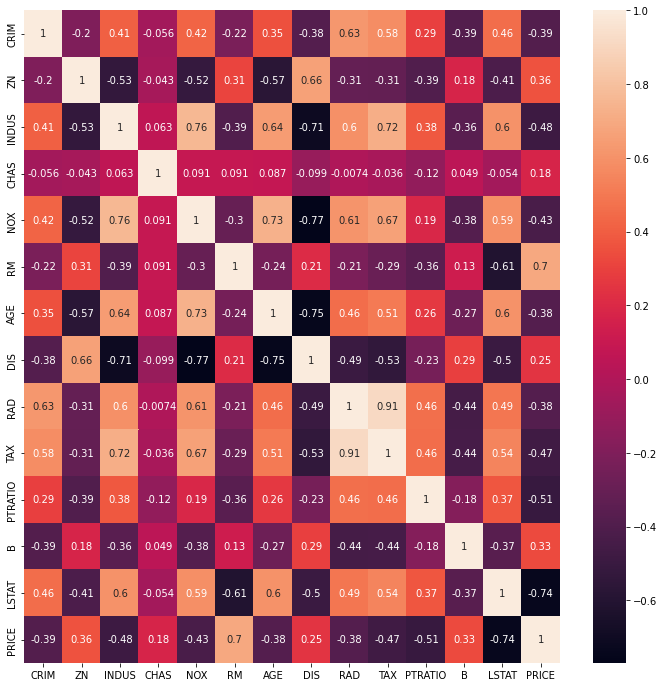

In [117]:
corelation=df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [118]:
columns = list(corelation['PRICE'].index)
high_cor_PRICE = [col for col in columns if (corelation['PRICE'][col]>0.4) or (corelation['PRICE'][col]<-0.4)]
high_cor_PRICE = high_cor_PRICE[:-1]
high_cor_PRICE

['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

NOTE : The above code snippet gives us the highly correlated(negative or positive) features with `PRICE`.High correlation(absolute value) means high linear relationship with `PRICE`. It does not cover other possible relationships such as quadratic or cubic

In [133]:
#Finding highly correlated independent features(i.e excluding MSRP)
high_cor = []
for i in range(1,len(columns)-1):
    for j in range(i):
        if(columns[i] != 'PRICE'):
            if(corelation[columns[i]][columns[j]]>0.7 or corelation[columns[i]][columns[j]]<-0.7):
                high_cor.append((columns[i],columns[j]))

high_cor   

[('NOX', 'INDUS'),
 ('AGE', 'NOX'),
 ('DIS', 'INDUS'),
 ('DIS', 'NOX'),
 ('DIS', 'AGE'),
 ('TAX', 'INDUS'),
 ('TAX', 'RAD')]

NOTE : If we analyse the relationship between any 2 features of the dataset, we will observe that the tuples in the aboves list will each exhibit strong positive or negative linear relationship. This can be verified using the pairplot.

## Pairplot

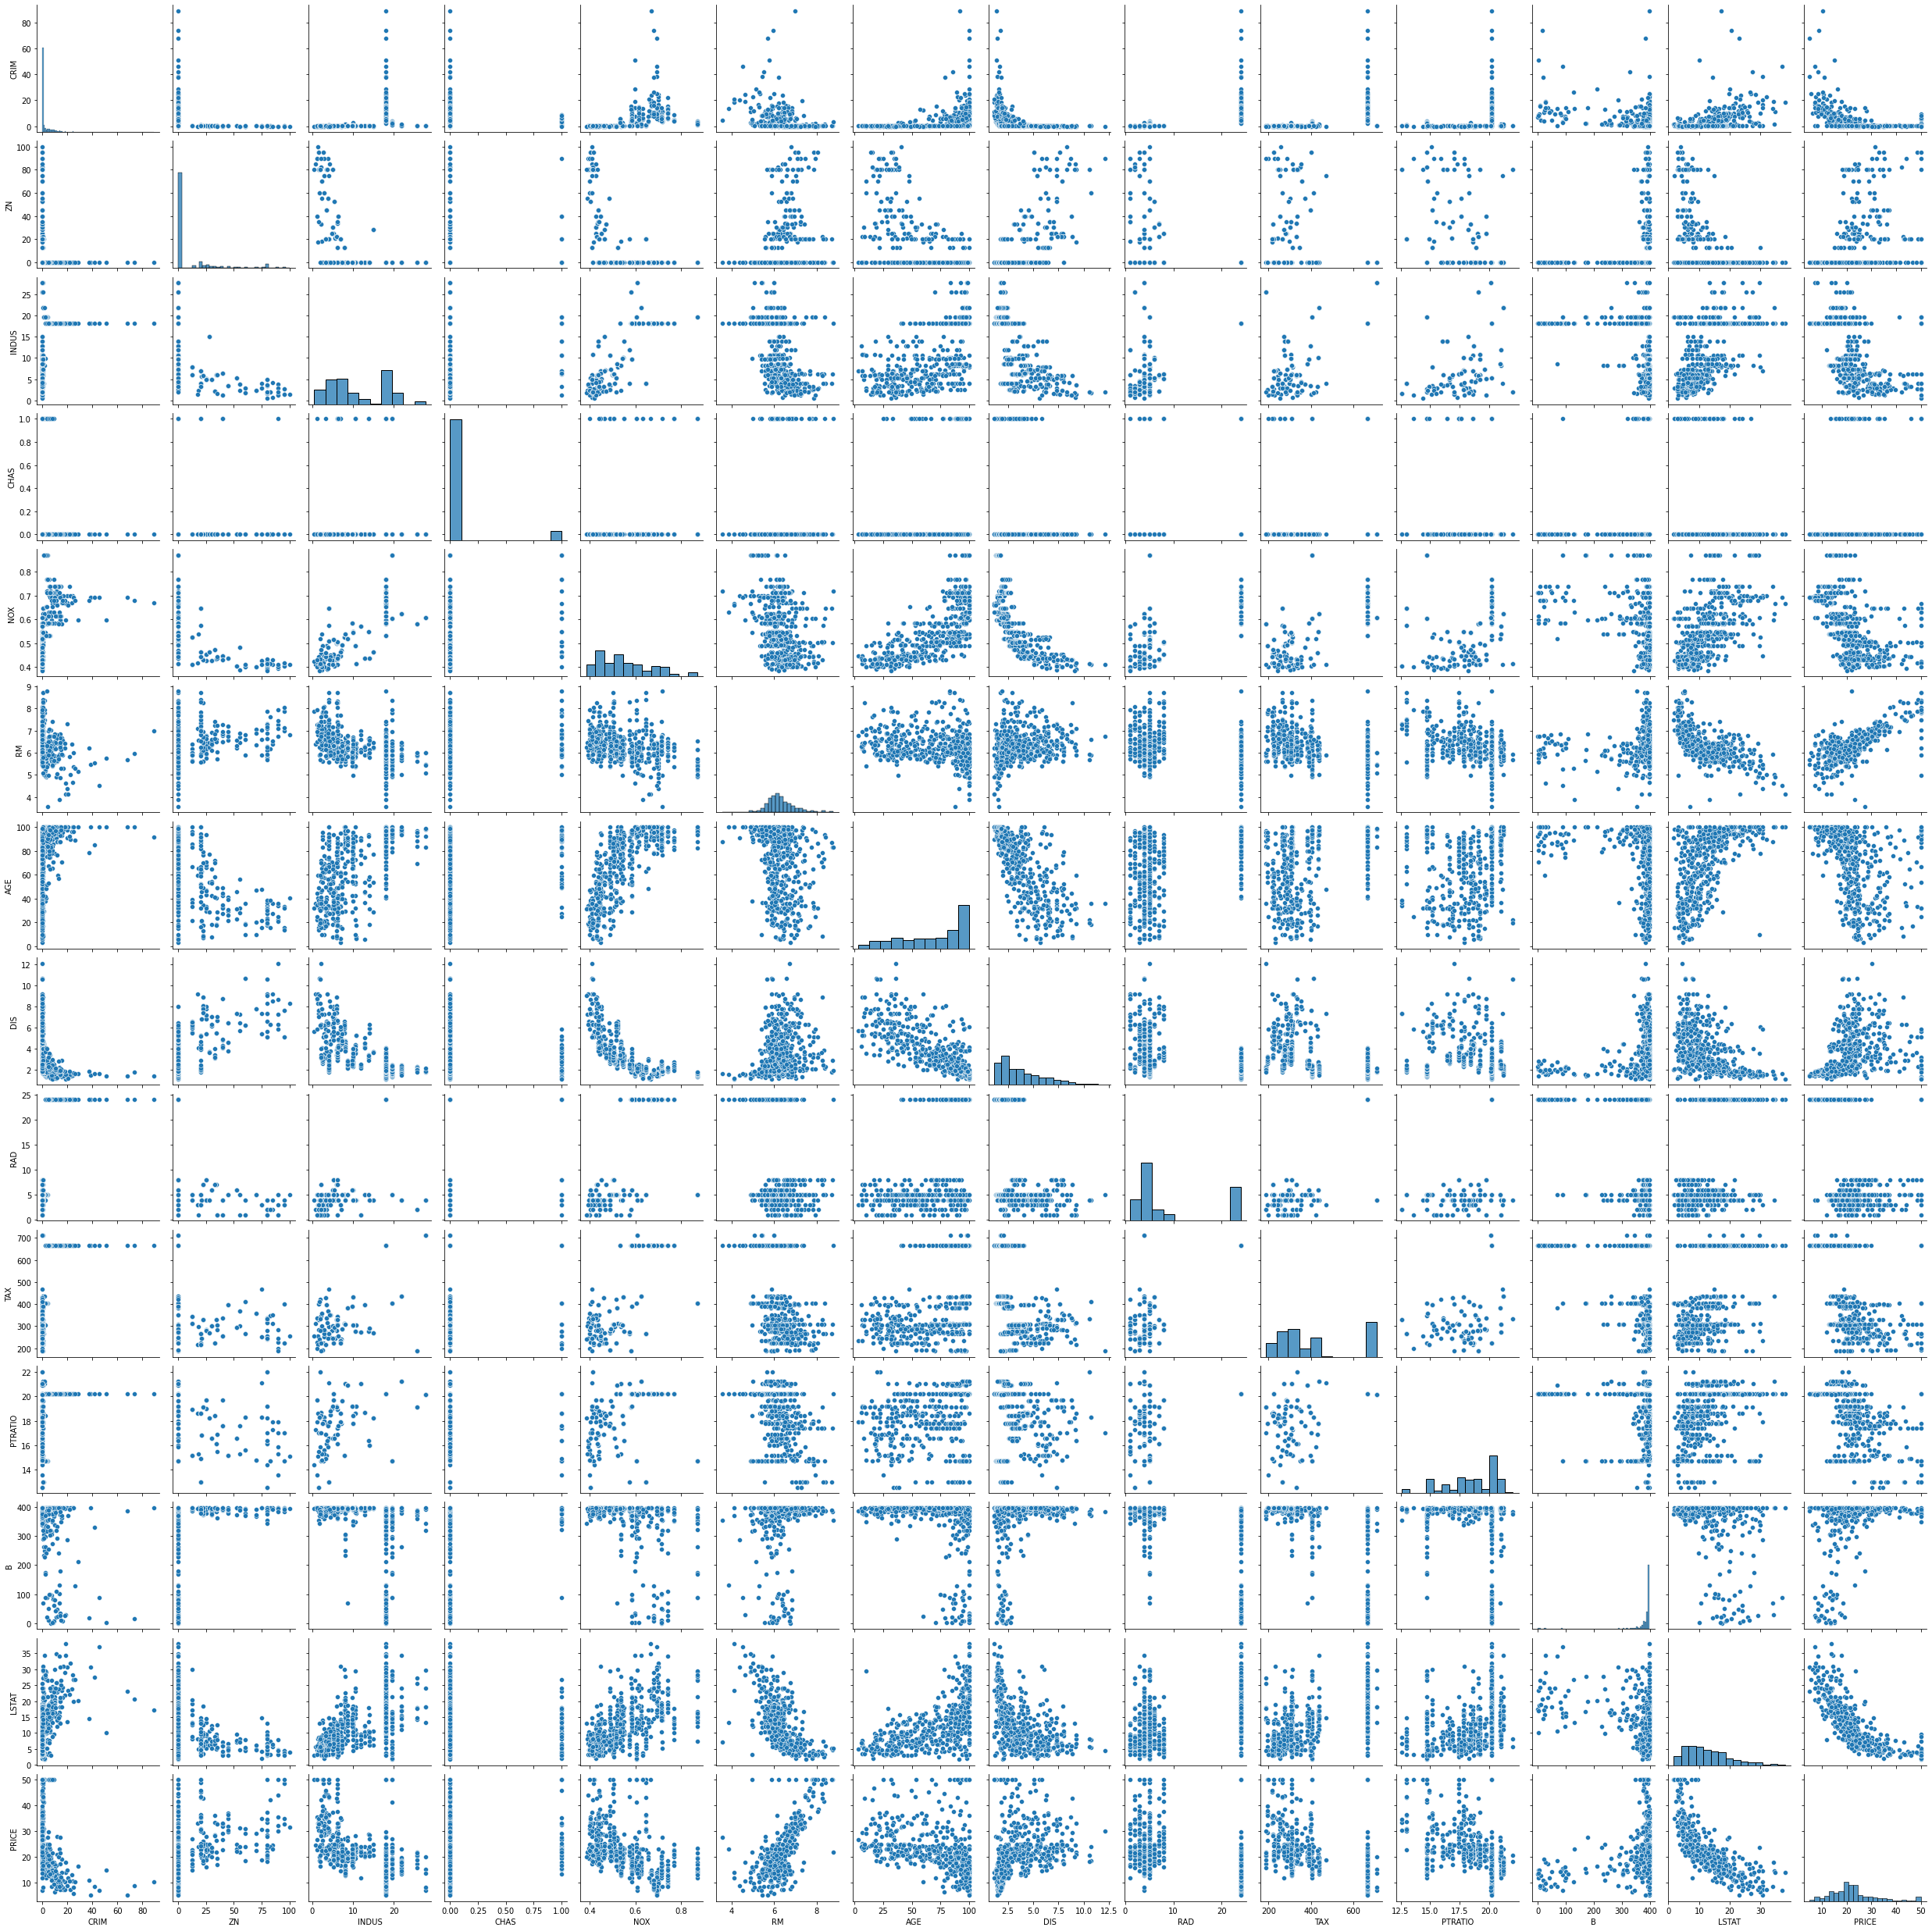

In [120]:
sns.pairplot(df)

## Analysing relationship with price

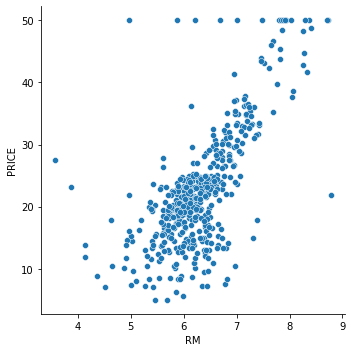

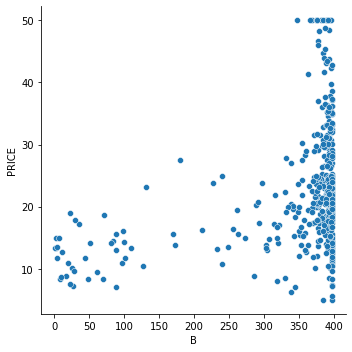

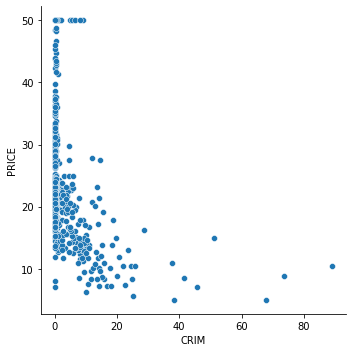

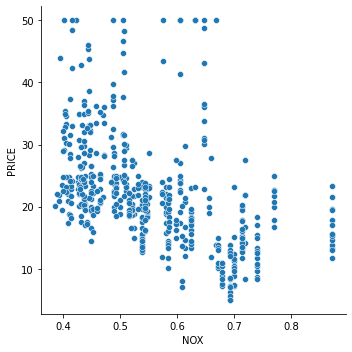

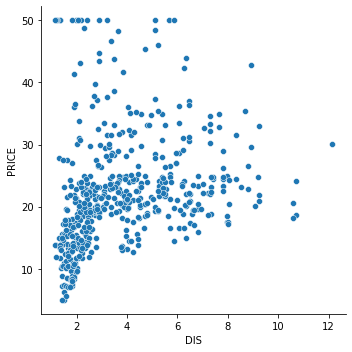

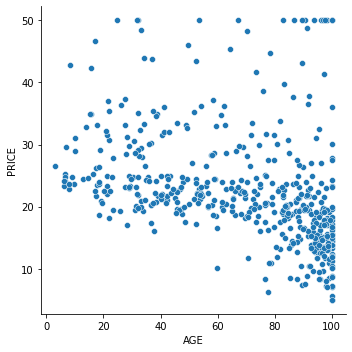

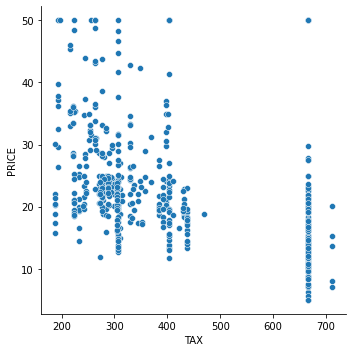

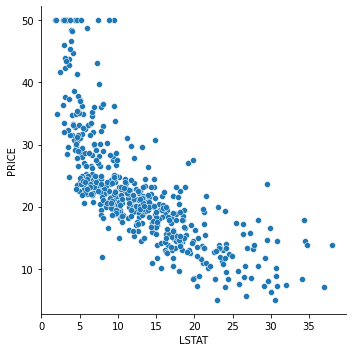

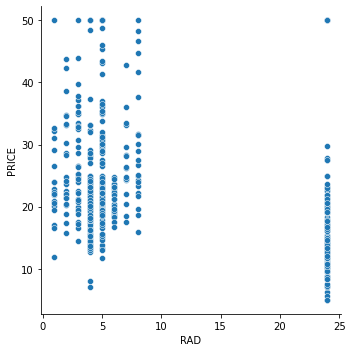

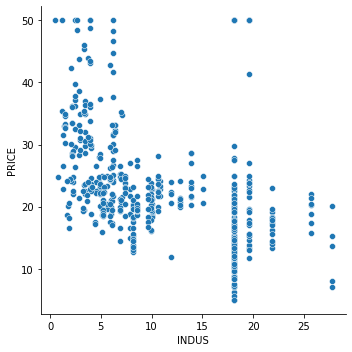

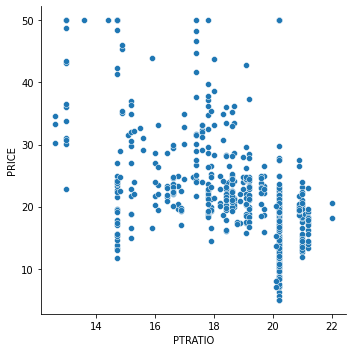

In [124]:
for col in list(set(df.columns) - {'PRICE','CHAS', 'ZN'}):
#     sns.relplot(data=df.groupby(col).median(),x=col,y='PRICE',kind='scatter')
      sns.relplot(data=df,x=col,y='PRICE',kind='scatter')

The visual representations support the fact that features such as : `CRIM`, `INDUS`, `LSTAT`, `NOX`,  `PTRATIO` and `RM` follow a linear relationship with `PRICE`. This supports their correlation values with `PRICE`.

`CRIM` : As crime rate increases, the price decreases, which supports the fact the areas with lesser crime rates are preferred more by people, which in turn led to the increase in the house price.

`INDUS` : Higher price areas have more established shops while lower priced areas tend to run on non-retail businesses.

`LSTAT` : As the name suggests, as the percentage of lower status society decreases, the price increases.

`NOX` : `NOX` levels are suggestive of the area having more factories, which in turn would reduce the pricing in that area.

`PTRATIO` : A decrease in `PTRATIO` increases the pricing in the area.

`RM` : Again, as the name suggests, if the number of rooms increases,the price also increases.

## Analysing relationship within continuous numerical features

In [130]:
[('NOX', 'INDUS'),
 ('AGE', 'NOX'),
 ('DIS', 'INDUS'),
 ('DIS', 'NOX'),
 ('DIS', 'AGE'),
 ('TAX', 'INDUS'),
 ('TAX', 'RAD')]

[('NOX', 'INDUS'),
 ('AGE', 'NOX'),
 ('DIS', 'INDUS'),
 ('DIS', 'NOX'),
 ('DIS', 'AGE'),
 ('TAX', 'INDUS'),
 ('TAX', 'RAD')]

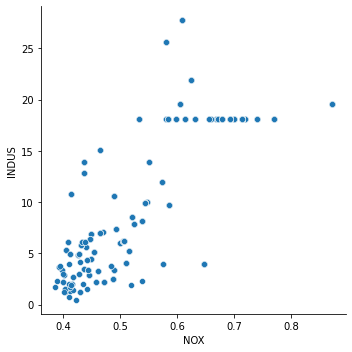

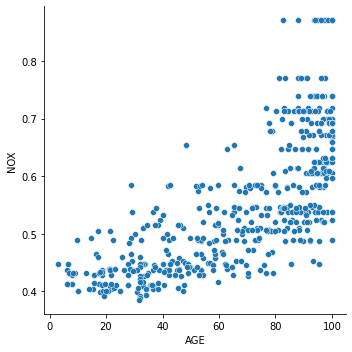

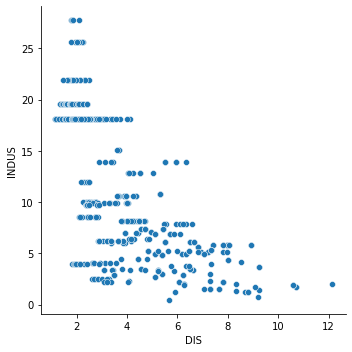

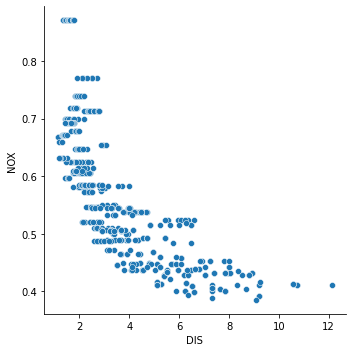

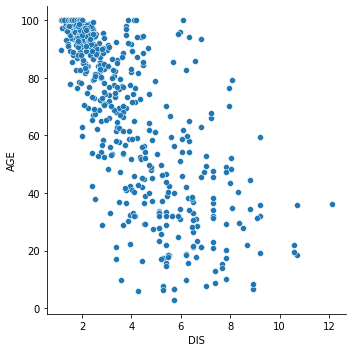

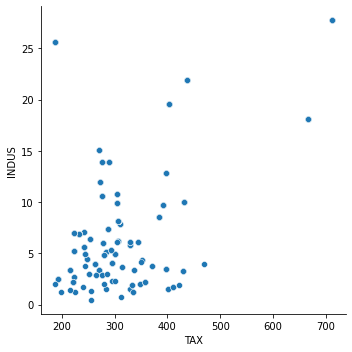

In [131]:
for c1,c2 in high_cor:
    if((c1 not in ['CHAS', 'RAD']) and (c2 not in ['RAD', 'CHAS'])):
        sns.relplot(data=df,x=c1,y=c2,kind='scatter')

`NOX`, `INDUS` : Both the features are a measure of how high/low priced a house is in an area. Higher values for both imply that the house belongs to a lower class area. Thus, it is not a surprise that both have a linear relationship.

`AGE`, `NOX` : Older houses suggest a period where factories would have been built in its area. Thus, they have a positive linear relationship.

`DIS`, `INDUS` : As the distance to the employment centres increase, the non-retail businesses in the area decrease.

`DIS`, `NOX` : More employment centres in an area suggest it being a non industrial location, and thus, `NOX` decreases.

`INDUS`, `TAX` : There is a positive relationship with `INDUS` and `TAX`.


SUMMARY :
The phase of EDA for the above dataset has provided with essential information about the relationship among the features and their individual distributions. I have started this phase by initially cleaning the dataset with preliminary methods(dropping null value rows/columns). 
Then I started analysing discrete numerical features with respect to their distributions and then their target variable(i.e `PRICE`)

Furthermore, a similar procedure has been carried out for continuous numerical columns, wherein I have analyzed the distribution with better and relevant tools like boxplots and distplots. I have calculated the outliers and skewness for each of these features.Correlation matrix has been used to find out highly correlated features(linear relationship).

This has been followed by the analysis of categorical variables, wherein I use bar plots to analyse their distribution and also segregate them with respect to their `PRICE`).

Fourthly, I have seperately analysed highly correlated features, applying the relevant tools such as sns.relplot and sns.catplot, in order to justify their high correlation visually. 

Finally, I have presented the plain distribtion curves for the numerical variables, which make better sense if they are continuous.